<a href="https://colab.research.google.com/github/killianstorm/simulated-anthropomorphic-finger/blob/master/learning_grasp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook learns a full grasp trajectory as discussed in Chapter 7. The graphs are displayed in this notebook but are also save to the local disk. The animation is saved to the root folder. 

In [0]:
! git clone https://github.com/killianstorm/simulated-anthropomorphic-finger

In [1]:
import sys
import os

sys.path.append('/content/simulated-anthropomorphic-finger/finger_model')
from analysis.learning.gradient_descent import *

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:127: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [0]:
# Interval.
tmax, dt = 1., 0.001
interval = num.arange(0, tmax + dt, dt)

fp = []
for i in interval:
    fp.append(10.)

p_predefined = {
    'interval': interval,
    'F_fs': np.zeros(interval.shape[0]),
    'F_io': np.zeros(interval.shape[0]),
    'F_fp': np.array(fp),
    'F_ed': np.zeros(interval.shape[0]),
}

name = "full grasp trajectory \n with angle loss function"
reference = simulate_predefined(p_predefined)

Performing gradient descent on model with tendons
Experiment name: full grasp trajectory 
 with angle loss function
Reference duration: 1.0
dt: 0.001
Start time is _12-Jun-2020_(21:45:12.065980)


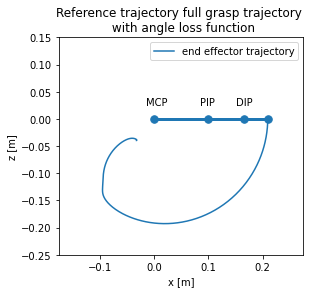

### Current loss for iteration 0 is: 4.167407681776854
Current optimal params are 
[ 1.0988619   0.96556144  1.24432084  0.90551889  0.21868828  1.21284976
 -0.63985808  1.74546853 -0.6654999   1.46200411 -2.5366293   2.58917344
  0.25874221  1.19842861 -0.53986545  1.70668136  0.96419975  0.96419975
  0.96419975  0.96419975  1.01261379  1.01261379  1.01261379  1.01261379
  0.91070591  0.91070591  0.91070591  0.91070591  1.03418824  1.03418824
  1.03418824  1.03418824]
Time passed since start: 0:01:01.676998
Average time per iteration: 0:01:01.676998

### Current loss for iteration 1 is: 3.1433995986178873
Time passed since start: 0:01:08.749815
Average time per iteration: 0:00:34.374908

         Current function value: 3.143400
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


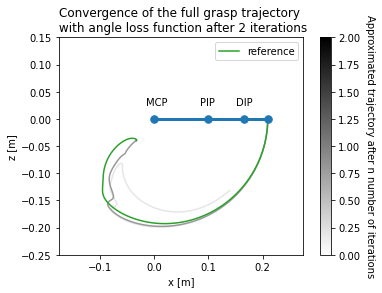

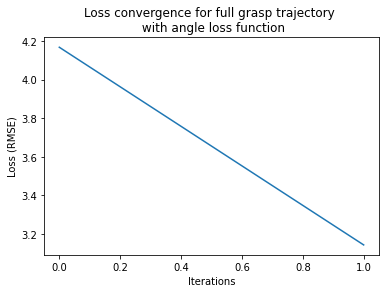

The losses convergence:
[DeviceArray(4.16740768, dtype=float64), DeviceArray(3.1433996, dtype=float64)]
Gradient descent has finished.
The best solution seems to be:
{'rnn_tau': DeviceArray([1.15942505, 0.95788823, 1.83619871, 0.88095411], dtype=float64), 'rnn_bias': DeviceArray([ 0.11781688,  1.27175643, -1.39547488,  1.93950322], dtype=float64), 'rnn_gains': DeviceArray([-1.04534184,  1.5865699 , -3.20091806,  3.00266994], dtype=float64), 'rnn_states': DeviceArray([ 0.2053461 ,  1.25482891, -0.93259128,  1.89067179], dtype=float64), 'rnn_weights': DeviceArray([[0.94604995, 0.91806708, 0.94021306, 0.91784438],
             [1.01554737, 1.014685  , 1.01514319, 1.01467313],
             [0.79484927, 0.5540462 , 0.71217202, 0.55063761],
             [1.04307349, 1.04305388, 1.04306913, 1.04305378]],            dtype=float64), 'interval': array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]), 'reference': {'angles': DeviceArray([[ 1.57079633e+00,  1.57079633e+00,  1.57079633e+00,
       

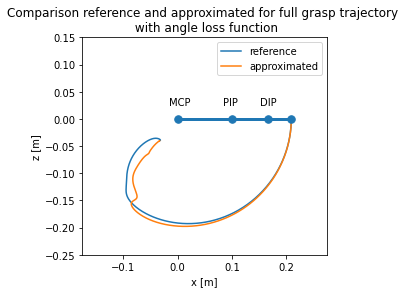

Plotting the used forces/torques


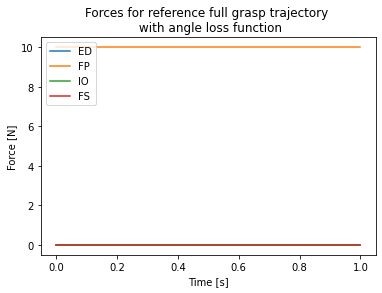

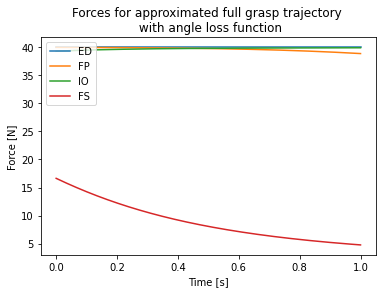

  0%|          | 0/101 [00:00<?, ?it/s]

Animating the comparison between the reference and the approximation.


100%|██████████| 101/101 [00:39<00:00,  2.58it/s]

[MoviePy] >>>> Building video full grasp trajectory 
 with angle loss function_12-Jun-2020_(21:47:06.966366).mp4
[MoviePy] Writing video full grasp trajectory 
 with angle loss function_12-Jun-2020_(21:47:06.966366).mp4



100%|██████████| 102/102 [00:07<00:00, 13.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: full grasp trajectory 
 with angle loss function_12-Jun-2020_(21:47:06.966366).mp4 

Process has finished.


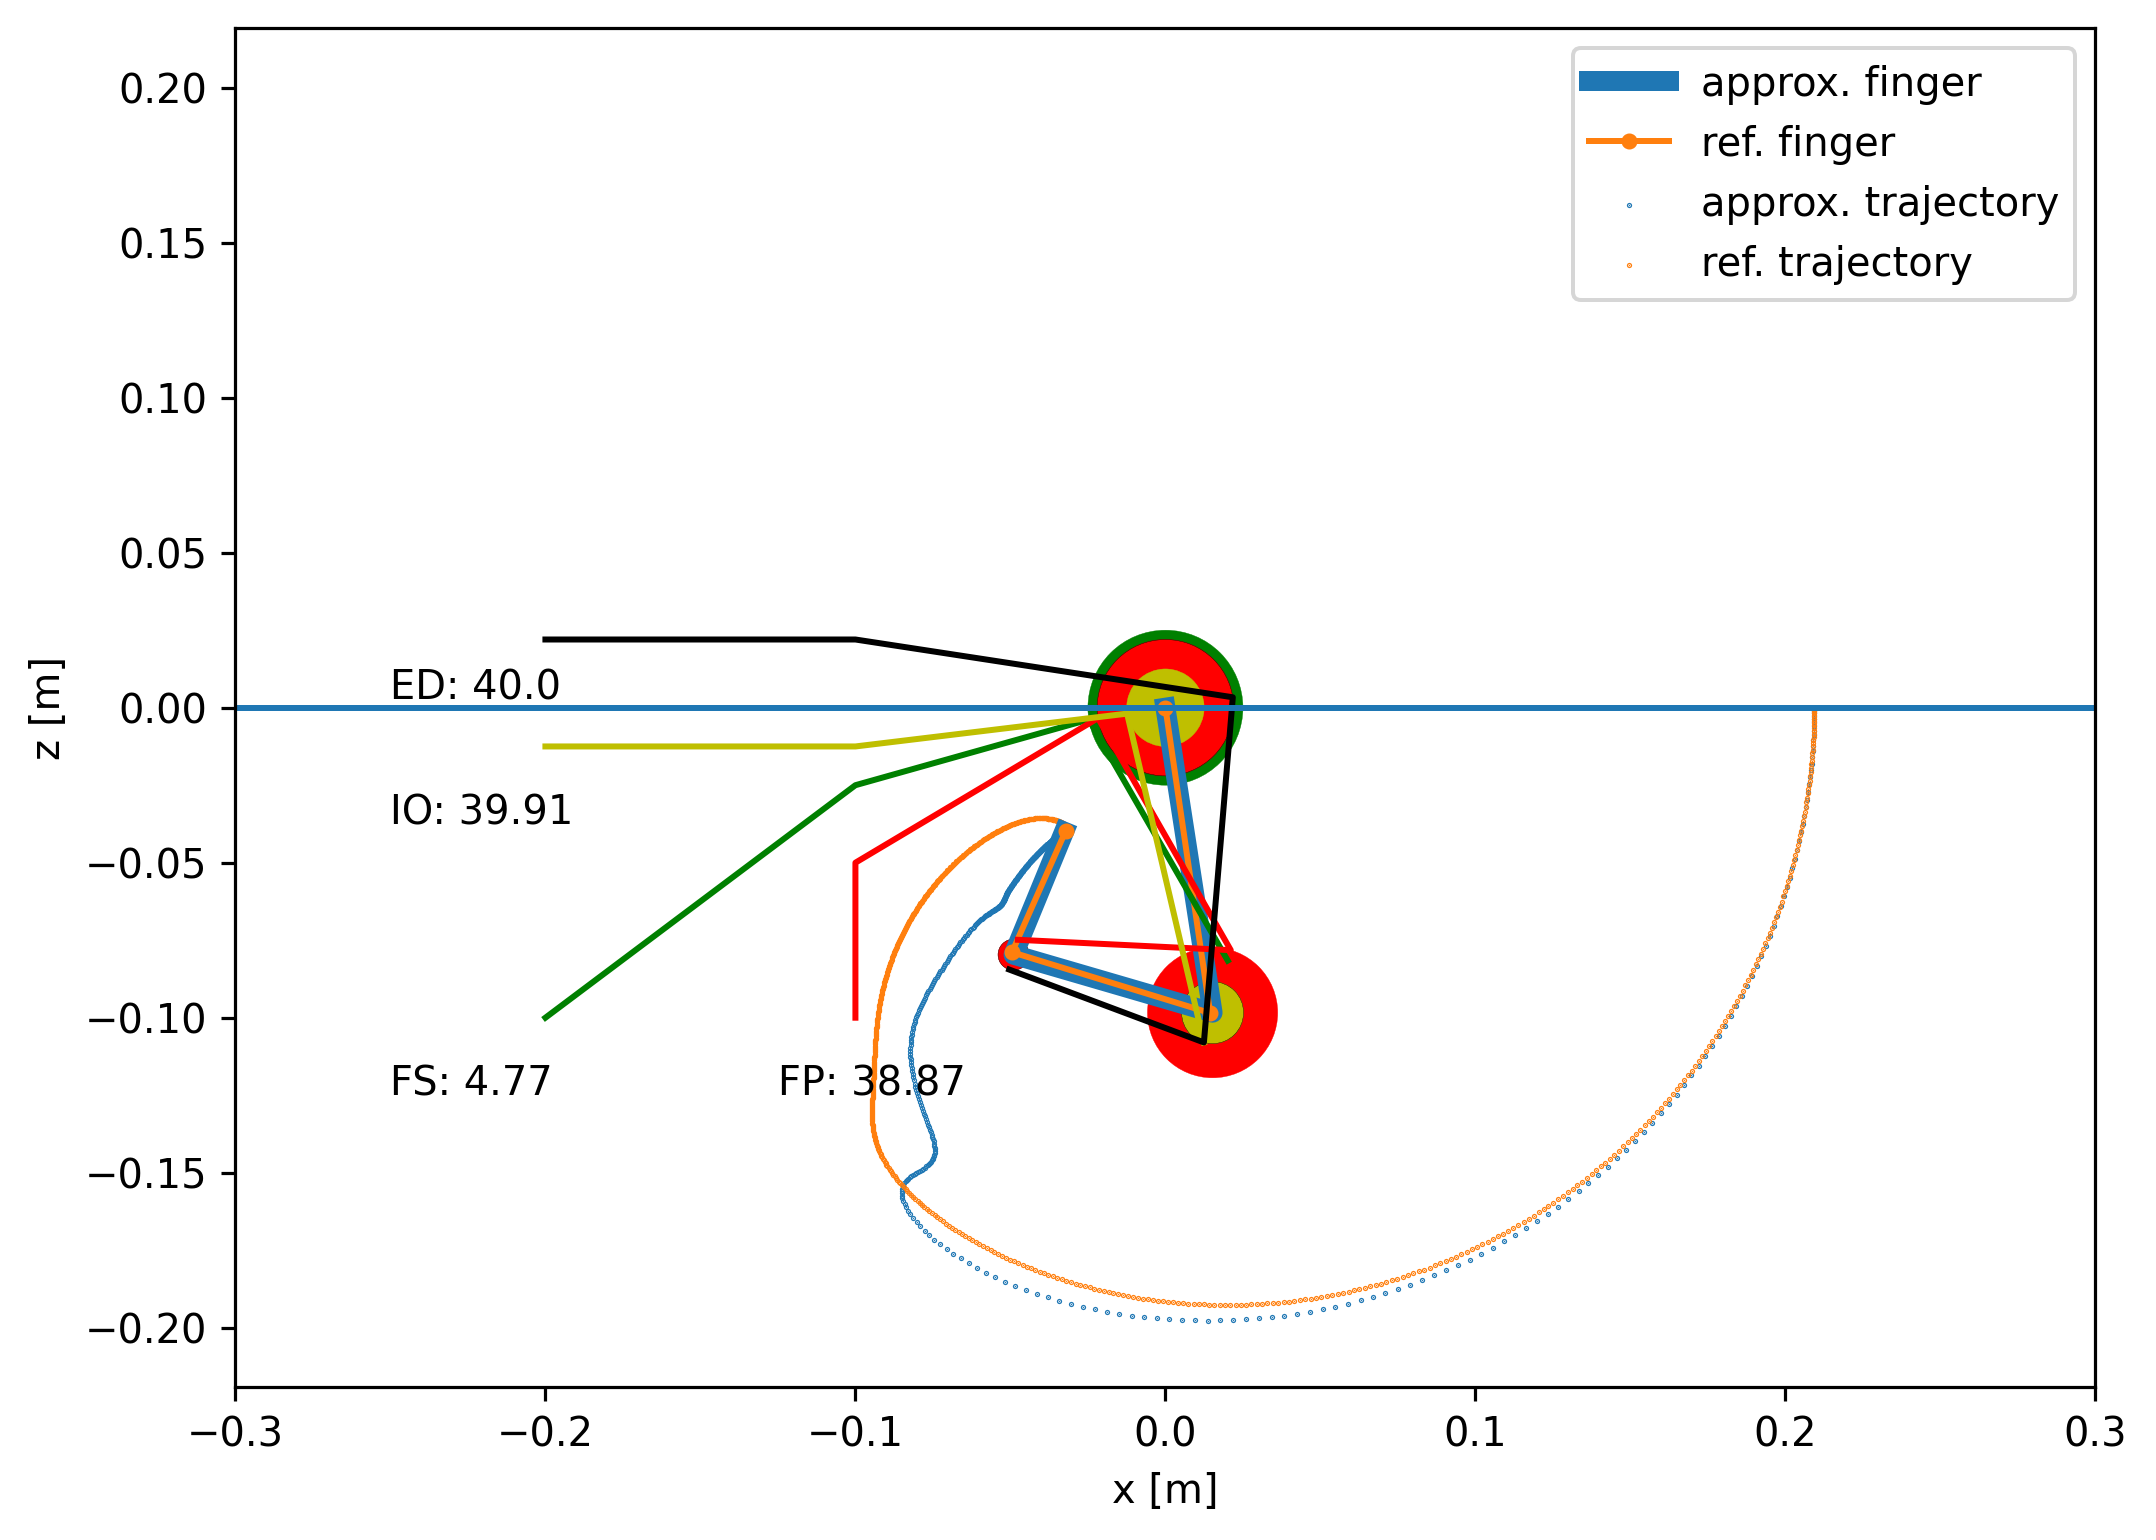

In [4]:
loss_function = loss_angles

# Learn to reproduce trajectory using gradient descent.
learn_gradient_descent(reference, interval, 2, loss_function=loss_function, tendons=True, name=name)

In [0]:
loss_function = loss_endeffector

# Learn to reproduce trajectory using gradient descent.
learn_gradient_descent(reference, interval, 250, loss_function=loss_function, tendons=True, name=name)